# CITEseq data analysis
*Author: Lena Boehme, Taghon lab, 2024*

## Plotting for Figures: Annotation of CITEseq data

Refer to annotation script for background information, this is just the plotting.

In [1]:
options(repr.plot.width=12, repr.plot.height=6)

options(scipen=100) #avoid scientific notation of numbers

library(SeuratDisk)
library(Seurat)
library(matrixStats)
library(ggplot2)
library(pheatmap)
library(reshape2)
library(dplyr)
library(tidyr)
library(viridis)
library(RColorBrewer)
library(stringr)
library(scales)


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject


Attaching package: ‘dplyr’


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal




In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Brussels
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] scales_1.3.0          stringr_1.5.1         RColorBrewer_1.1-3   
 [4] viridis_0.6.5         viridisLite_0.4.2     tidyr_1.3.1          
 [7] dplyr_1.1.4           reshape2_1.4.4        pheatmap_1.0.12   

In [5]:
seurObj_CITE <- LoadH5Seurat('./HTSA_CITE_anno_clean.h5seurat')

Validating h5Seurat file

Initializing ADT with data

Adding counts for ADT

Adding miscellaneous information for ADT

Initializing ADTdsb with data

Adding scale.data for ADTdsb

Adding feature-level metadata for ADTdsb

Adding variable feature information for ADTdsb

Adding miscellaneous information for ADTdsb

Initializing ADTdsbneg with data

Adding miscellaneous information for ADTdsbneg

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding variable feature information for RNA

Adding miscellaneous information for RNA

Initializing RNA_cellranger with data

Adding counts for RNA_cellranger

Adding miscellaneous information for RNA_cellranger

Adding reduction mnn_adt

Adding cell embeddings for mnn_adt

Adding miscellaneous information for mnn_adt

Adding reduction mnn_adt2

Adding cell embeddings for mnn_adt2

Adding miscellaneous information for mnn_adt2

Adding reduction pca_adt

Adding cell embeddings for p

In [6]:
load('CITE_palettes.RData')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



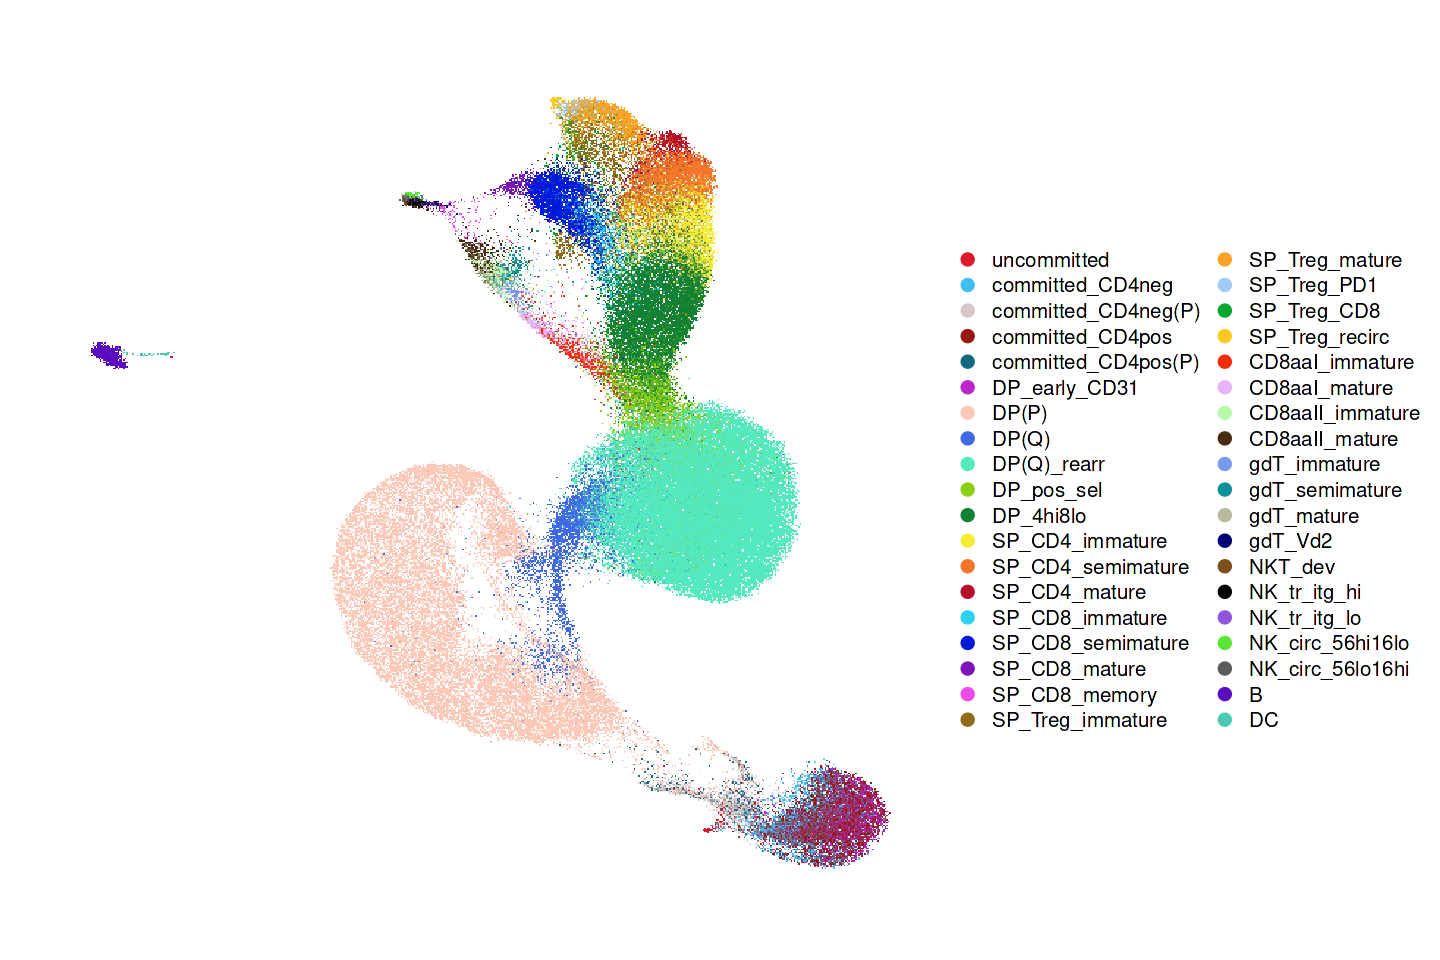

In [31]:
options(repr.plot.width=12, repr.plot.height=8)

p1 <- DimPlot(seurObj_CITE, reduction = 'umap_wnn_mnn', group.by = 'anno_CITE_new', pt.size = 1, shuffle=T, cols = pal39, raster = TRUE, raster.dpi = c(600,600))+
    guides(x = "none", y = "none")+
    labs(x='', y='', title= '')

p1

In [8]:
celltypes <- levels(seurObj_CITE$anno_CITE_new)
names(celltypes) <- seq_along(celltypes)
celltypes

1                     2                     3 
        "uncommitted"    "committed_CD4neg" "committed_CD4neg(P)" 
                    4                     5                     6 
   "committed_CD4pos" "committed_CD4pos(P)"       "DP_early_CD31" 
                    7                     8                     9 
              "DP(P)"               "DP(Q)"         "DP(Q)_rearr" 
                   10                    11                    12 
         "DP_pos_sel"           "DP_4hi8lo"     "SP_CD4_immature" 
                   13                    14                    15 
  "SP_CD4_semimature"       "SP_CD4_mature"     "SP_CD8_immature" 
                   16                    17                    18 
  "SP_CD8_semimature"       "SP_CD8_mature"       "SP_CD8_memory" 
                   19                    20                    21 
   "SP_Treg_immature"      "SP_Treg_mature"         "SP_Treg_PD1" 
                   22                    23                    24 
        "SP_Treg_CD8"      "SP_Treg_recirc"     "CD8aaI_immature" 
                   25                    26                    27 
      "CD8aaI_mature"    "CD8aaII_immature"      "CD8aaII_mature" 
                   28                    29                    30 
       "gdT_immature"      "gdT_semimature"          "gdT_mature" 
                   31                    32                    33 
            "gdT_Vd2"             "NKT_dev"        "NK_tr_itg_hi" 
                   34                    35                    36 
       "NK_tr_itg_lo"    "NK_circ_56hi16lo"    "NK_circ_56lo16hi" 
                   37                    38                    39 
                  "B"                  "DC"             "unknown"

### Immature subsets

In [9]:
immature <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[1:7])

In [10]:
markers_prot_immature <-  c('CD34','CD1a', 'CD44','CD4', 'CD8', 'CD45RA', 'CD5', 'CD7', 'CD71', 'CD31')
markers_rna_immature <-  c('PCNA','RAG1', 'DNTT', 'PTCRA', 'TRBC1', 'TRGC1', 'TRDC', 'TRAC','CD8A', 'CD8B')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


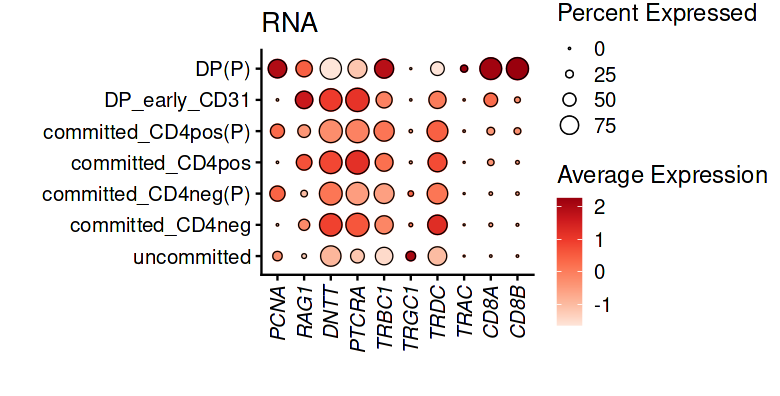

In [12]:
options(repr.plot.width=6.5, repr.plot.height=3.3)

p2 <- DotPlot(immature, features = markers_rna_immature, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1,vjust=0.5,  face = 'italic'), plot.title = element_text(face = 'plain'))
p2

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 2.92

Picking joint bandwidth of 0.335

Picking joint bandwidth of 0.583

Picking joint bandwidth of 0.317

Picking joint bandwidth of 0.415

Picking joint bandwidth of 0.91

Picking joint bandwidth of 0.276

Picking joint bandwidth of 0.909

Picking joint bandwidth of 1.12

Picking joint bandwidth of 1.06



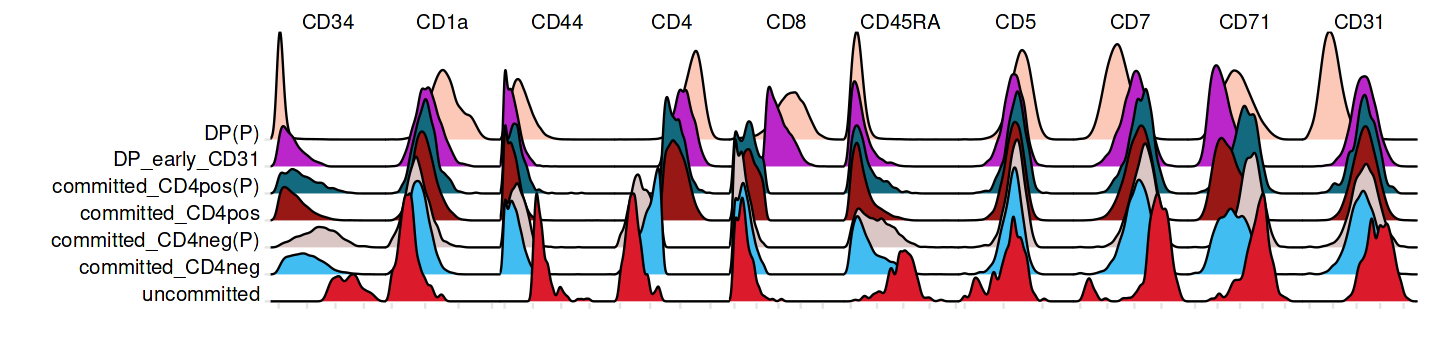

In [85]:
options(repr.plot.width=12, repr.plot.height=3)

p3 <- RidgePlot(immature, features = markers_prot_immature, group.by = 'anno_CITE_new', cols = pal39[1:7], ncol=5, stack = T, fill.by = 'ident')&
theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p3

### DP subsets

In [14]:
DP <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[6:11])

In [15]:
markers_prot_DP <-  c('CD4', 'CD8', 'CD31','CD3', 'CD28','TCRab', 'CD44', 'CD71', 'CD5', 'CD69')
markers_rna_DP <-  c('PCNA','RAG1',  'DNTT', 'PTCRA', 'TRBC1', 'TRAC', 'NR4A1')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


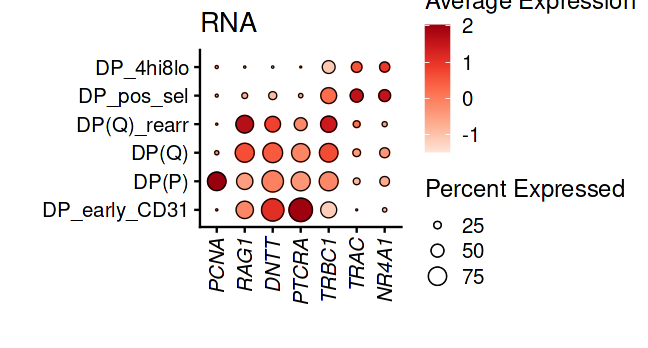

In [16]:
options(repr.plot.width=5.4, repr.plot.height=2.9)

p4 <- DotPlot(DP, features = markers_rna_DP, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, face = 'italic'), plot.title = element_text(face = 'plain'))
p4

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 0.229

Picking joint bandwidth of 0.439

Picking joint bandwidth of 0.674

Picking joint bandwidth of 0.423

Picking joint bandwidth of 0.443

Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.526

Picking joint bandwidth of 0.589

Picking joint bandwidth of 0.181

Picking joint bandwidth of 0.273



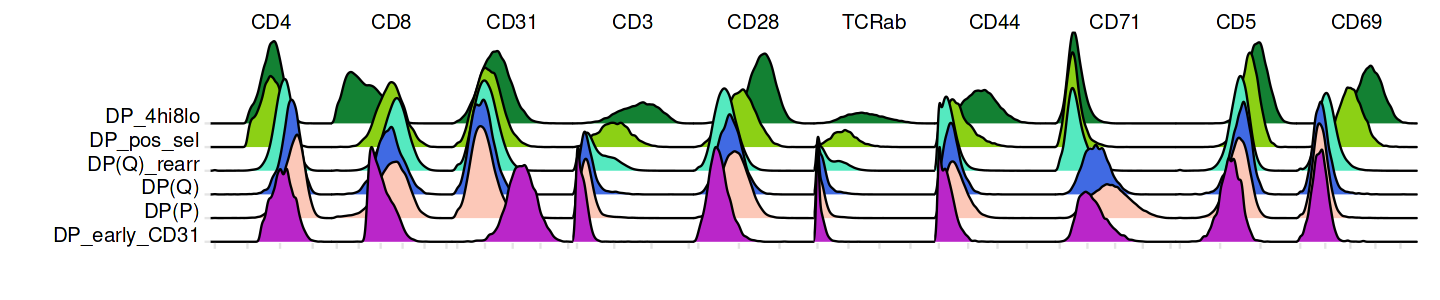

In [21]:
options(repr.plot.width=12, repr.plot.height=2.5)

p5 <- RidgePlot(DP, features = markers_prot_DP, group.by = 'anno_CITE_new', cols = pal39[6:11], ncol=5, stack = T, fill.by = 'ident')&
    theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p5

###  SP subsets

In [18]:
SP <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[10:18])

In [19]:
markers_rna_SP <-  c('ZBTB7B', 'RUNX3','GZMK', 'SOX4', 'CD4', 'CD8A', 'CD8B')
markers_prot_SP <-  c('CD4', 'CD8', 'CD69', 'CD3', 'TCRab', 'CD1a', 'CD44', 'CD27','CD45RA', 'CD45RO')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


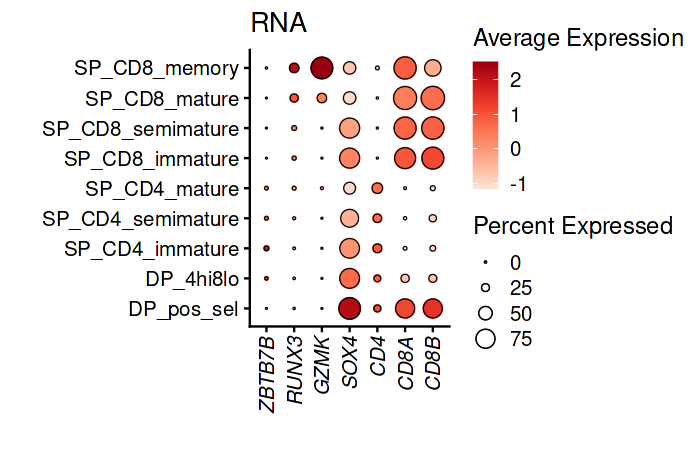

In [20]:
options(repr.plot.width=5.8, repr.plot.height=3.8)

p6 <- DotPlot(SP, features = markers_rna_SP, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, face = 'italic'), plot.title = element_text(face = 'plain'))
p6

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 0.291

Picking joint bandwidth of 0.553

Picking joint bandwidth of 0.62

Picking joint bandwidth of 0.831

Picking joint bandwidth of 0.475

Picking joint bandwidth of 0.34

Picking joint bandwidth of 1.05

Picking joint bandwidth of 1.53

Picking joint bandwidth of 1.63

Picking joint bandwidth of 0.252



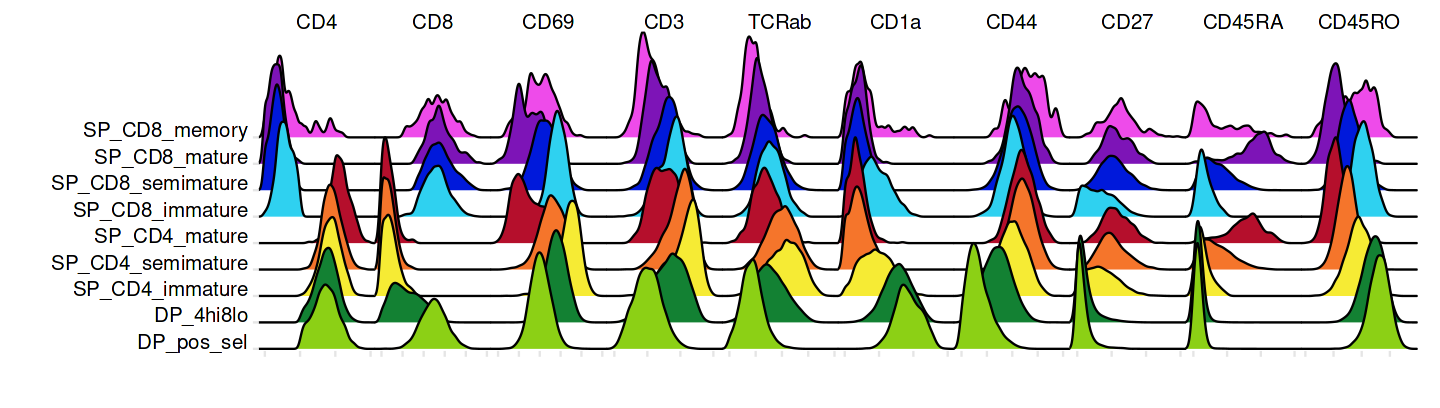

In [27]:
options(repr.plot.width=12, repr.plot.height=3.4)

p7 <- RidgePlot(SP, features = markers_prot_SP, group.by = 'anno_CITE_new', cols = pal39[10:18], ncol=5, stack = T, fill.by = 'ident')&
    theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p7

### Tregs

In [22]:
Treg <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[c(12, 19:23)])

In [23]:
markers_rna_Treg <- c('FOXP3', 'IL2RA','NR4A1', 'FOXO1', 'KLF2', 'PRDM1', 'MAF', 'BATF')
markers_prot_Treg <-  c('CD25','CD4', 'CD8', 'CD1a', 'CD27','CD134', 'CD278', 'CD39', 'CD103', 'CD95', 'CD31')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


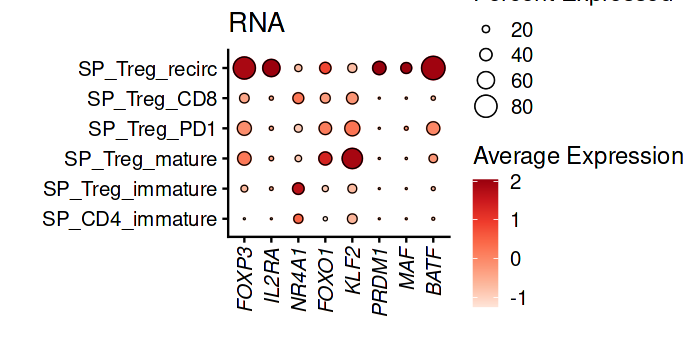

In [24]:
options(repr.plot.width=5.8, repr.plot.height=3)

p8 <- DotPlot(Treg, features = markers_rna_Treg, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, face = 'italic'), plot.title = element_text(face = 'plain'))
p8

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 2.26

Picking joint bandwidth of 0.391

Picking joint bandwidth of 0.608

Picking joint bandwidth of 0.458

Picking joint bandwidth of 2.45

Picking joint bandwidth of 1.05

Picking joint bandwidth of 0.502

Picking joint bandwidth of 2.98

Picking joint bandwidth of 2.13

Picking joint bandwidth of 1.12

Picking joint bandwidth of 1.08



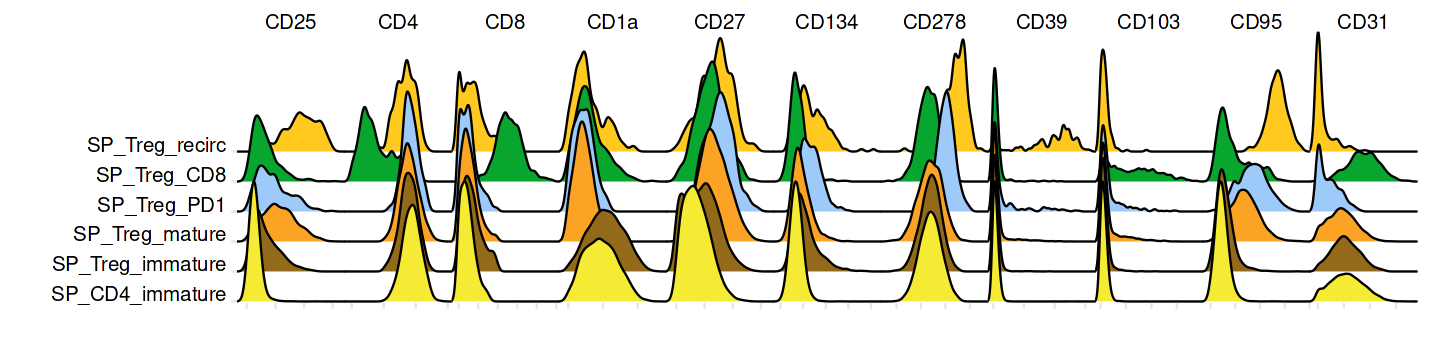

In [33]:
options(repr.plot.width=12, repr.plot.height=3)

p9 <- RidgePlot(Treg, features = markers_prot_Treg, group.by = 'anno_CITE_new', cols = pal39[c(12, 19:23)], ncol=5, stack = T, fill.by = 'ident')&
    theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p9

In [34]:
pdf(paste0(fig_path,"ridge_Treg.pdf"), width = 12, height = 3, useDingbats=FALSE)
p9
dev.off()

Picking joint bandwidth of 2.26

Picking joint bandwidth of 0.391

Picking joint bandwidth of 0.608

Picking joint bandwidth of 0.458

Picking joint bandwidth of 2.45

Picking joint bandwidth of 1.05

Picking joint bandwidth of 0.502

Picking joint bandwidth of 2.98

Picking joint bandwidth of 2.13

Picking joint bandwidth of 1.12

Picking joint bandwidth of 1.08



png 
  2

### CD8aa + gdT

In [26]:
unconv <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[c(24:31)])

In [27]:
markers_prot_unconv <-  c('CD8','TCRab', 'TCRgd','TCR-Vd2','CD1a', 'CD44','CD27', 'CD10', 'CD7', 'CD73', 'CD3', 'CD7','CD31')
markers_rna_unconv <- c('GNG4', 'ZNF683','KLF2', 'S1PR1', 'TRGC1', 'TRGC2', 'TRDC', 'CD8A', 'CD8B')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


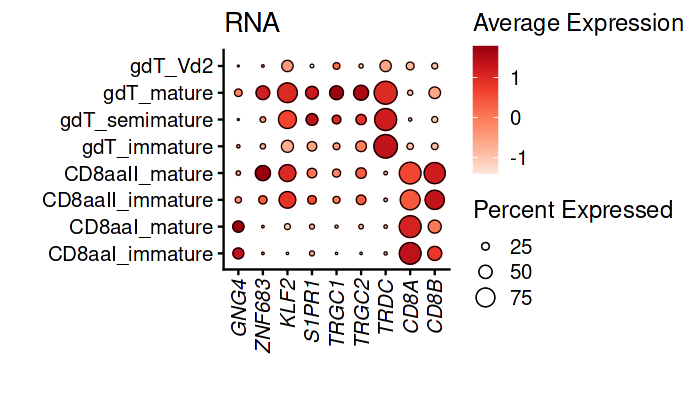

In [28]:
options(repr.plot.width=5.8, repr.plot.height=3.3)

p10 <- DotPlot(unconv, features = markers_rna_unconv, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, face = 'italic'), plot.title = element_text(face = 'plain'))
p10

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 0.824

Picking joint bandwidth of 0.475

Picking joint bandwidth of 1.3

Picking joint bandwidth of 1.83

Picking joint bandwidth of 0.535

Picking joint bandwidth of 1.46

Picking joint bandwidth of 2.83

Picking joint bandwidth of 1.37

Picking joint bandwidth of 1.24

Picking joint bandwidth of 1.65

Picking joint bandwidth of 1.25

Picking joint bandwidth of 1.64



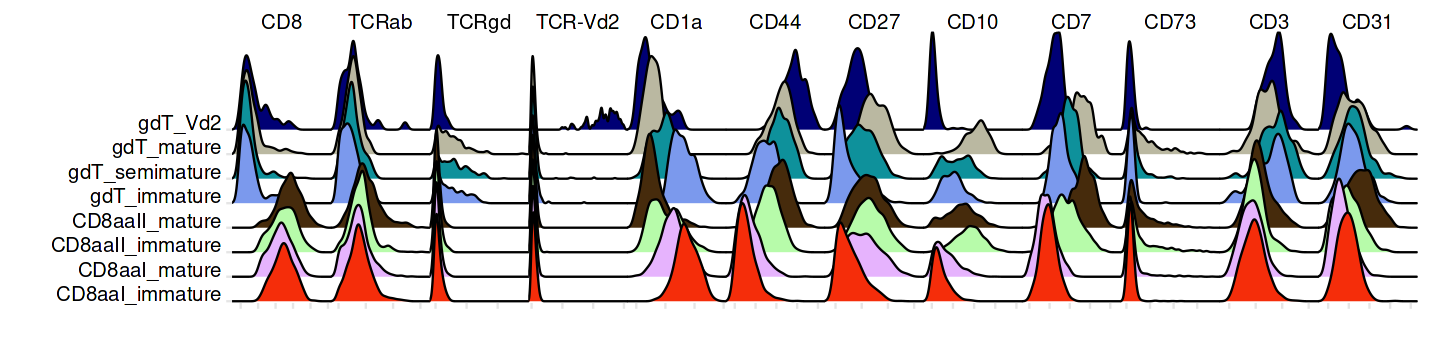

In [32]:
options(repr.plot.width=12, repr.plot.height=3)

p11 <- RidgePlot(unconv, features = markers_prot_unconv, group.by = 'anno_CITE_new', cols = pal39[24:31], ncol=5, stack = T, fill.by = 'ident')&
    theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p11

### NK(T)

In [33]:
NK <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[c(9, 32:36)])

In [34]:
markers_prot_NK <-  c('CD4', 'CD8', 'CD3', 'TCRab','CD1a', 'CD16', 'CD56', 'CD161', 'CD69', 'CD62L', 'Integrin-B7', 'CD103', 'CD49a')
markers_rna_NK <- c('RAG1', 'RAG2', 'DNTT', 'KLRD1', 'NKG7', 'GZMB','ZBTB16')

In [35]:
celltypes

1                     2                     3 
        "uncommitted"    "committed_CD4neg" "committed_CD4neg(P)" 
                    4                     5                     6 
   "committed_CD4pos" "committed_CD4pos(P)"       "DP_early_CD31" 
                    7                     8                     9 
              "DP(P)"               "DP(Q)"         "DP(Q)_rearr" 
                   10                    11                    12 
         "DP_pos_sel"           "DP_4hi8lo"     "SP_CD4_immature" 
                   13                    14                    15 
  "SP_CD4_semimature"       "SP_CD4_mature"     "SP_CD8_immature" 
                   16                    17                    18 
  "SP_CD8_semimature"       "SP_CD8_mature"       "SP_CD8_memory" 
                   19                    20                    21 
   "SP_Treg_immature"      "SP_Treg_mature"         "SP_Treg_PD1" 
                   22                    23                    24 
        "SP_Treg_CD8"      "SP_Treg_recirc"     "CD8aaI_immature" 
                   25                    26                    27 
      "CD8aaI_mature"    "CD8aaII_immature"      "CD8aaII_mature" 
                   28                    29                    30 
       "gdT_immature"      "gdT_semimature"          "gdT_mature" 
                   31                    32                    33 
            "gdT_Vd2"             "NKT_dev"        "NK_tr_itg_hi" 
                   34                    35                    36 
       "NK_tr_itg_lo"    "NK_circ_56hi16lo"    "NK_circ_56lo16hi" 
                   37                    38                    39 
                  "B"                  "DC"             "unknown"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


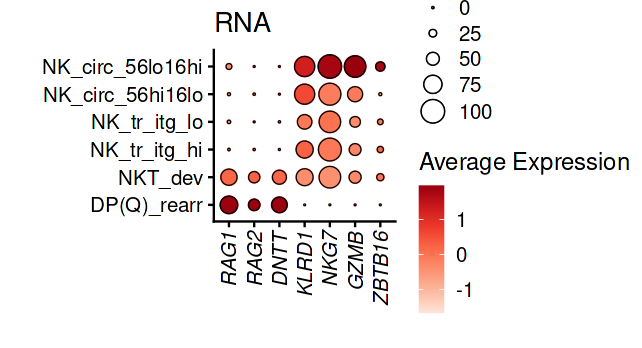

In [41]:
options(repr.plot.width=5.35, repr.plot.height=2.9)

p12 <- DotPlot(NK, features = markers_rna_NK, group.by = 'anno_CITE_new', scale=T, assay = 'RNA')+
    geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.4) +
    guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white")))+
    scale_color_distiller(palette = 'Reds', direction = 1)+
    labs(x='', y='', title= 'RNA', size='Percent Expressed')+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, face = 'italic'), plot.title = element_text(face = 'plain'))
p12

Warning message:
“'ncol' is ignored with 'stack' is TRUE”
Picking joint bandwidth of 0.402

Picking joint bandwidth of 0.794

Picking joint bandwidth of 0.423

Picking joint bandwidth of 0.218

Picking joint bandwidth of 0.443

Picking joint bandwidth of 7.02

Picking joint bandwidth of 7.82

Picking joint bandwidth of 2.51

Picking joint bandwidth of 0.93

Picking joint bandwidth of 0.797

Picking joint bandwidth of 2.09

Picking joint bandwidth of 4.1

Picking joint bandwidth of 4.47



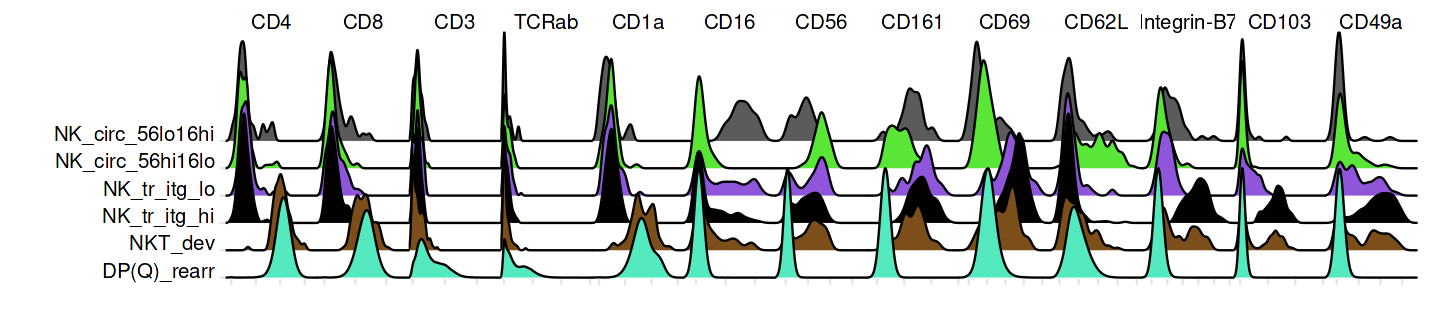

In [46]:
options(repr.plot.width=12, repr.plot.height=2.8)

p13 <- RidgePlot(NK, features = markers_prot_NK, group.by = 'anno_CITE_new', cols = pal39[c(9, 32:36)], ncol=5, stack = T, fill.by = 'ident')&
    theme(axis.text.x.bottom = element_blank(), panel.grid = element_blank(), strip.text.x.top = element_text(face='plain', angle = 0))&
    labs(x='', y='')&NoLegend()
p13

In [47]:
pdf(paste0(fig_path,"ridge_NK.pdf"), width = 12, height = 2.9, useDingbats=FALSE)
p13
dev.off()

Picking joint bandwidth of 0.402

Picking joint bandwidth of 0.794

Picking joint bandwidth of 0.423

Picking joint bandwidth of 0.218

Picking joint bandwidth of 0.443

Picking joint bandwidth of 7.02

Picking joint bandwidth of 7.82

Picking joint bandwidth of 2.51

Picking joint bandwidth of 0.93

Picking joint bandwidth of 0.797

Picking joint bandwidth of 2.09

Picking joint bandwidth of 4.1

Picking joint bandwidth of 4.47



png 
  2

## TCRseq

In [48]:
tcr_meta <- read.csv("/media/moredata/scSeq_analyses_HD2/B_TotalThymus_CITEseq/data/HSTA_paed_v21_anno.csv")

In [49]:
tcr_meta %>% head

,sample_barcode,n_genes,batch,chemistry,age_group,age_numeric,sampleID_TCRab,path_TCRab,type,study,⋯,spt_rna_DP_CD99late,spt_rna_DP_CD99early,spt_rna_DP_HSPH1,spt_spca_SP_Treg,spt_spca_SP_CD8aa,spt_spca_SP_CD4,spt_spca_SP_CD8,spt_spca_SP_TregCD8,leiden_2,predicted_cma
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,GSM4466783-TGCGGGTGTTTCGGCG,5769,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835
2,GSM4466783-GTCACTCTCTGCGATA,5840,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835
3,GSM4466783-GTCTAGAAGTGGTTCT,5922,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835
4,GSM4466783-CTTGATTCAGCGAACA,5950,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835
5,GSM4466783-CCTCCTCCAATACCTG,6360,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835
6,GSM4466783-TGCGGGTTCGCAGTGC,5725,111,3GEX,infant,0.2,,,cells,Bautista2021,⋯,NA,NA,NA,NA,NA,NA,NA,NA,29,0.5749835


In [50]:
tcr_meta$TRA_rearranged <- ifelse(tcr_meta$v_call_VJ_main %in% c('None','No_contig'), 'No/Unknown', 'Yes')
tcr_meta$TRB_rearranged <- ifelse(tcr_meta$v_call_VDJ_main %in% c('None','No_contig'), 'No/Unknown', 'Yes')

In [51]:
seurObj_CITE$TRA_rearranged <- tcr_meta$TRA_rearranged[match(seurObj_CITE$barcode, tcr_meta$backup_barcode)]
seurObj_CITE$TRB_rearranged <- tcr_meta$TRB_rearranged[match(seurObj_CITE$barcode, tcr_meta$backup_barcode)]

In [52]:
table(seurObj_CITE$anno_CITE_new, seurObj_CITE$TRA_rearranged)

                     
                      No/Unknown   Yes
  uncommitted                164     1
  committed_CD4neg          2832   136
  committed_CD4neg(P)       1137    41
  committed_CD4pos          5890   134
  committed_CD4pos(P)        537    20
  DP_early_CD31             2316   160
  DP(P)                    17919  5206
  DP(Q)                     2512  1459
  DP(Q)_rearr              21905 21660
  DP_pos_sel                 538  4204
  DP_4hi8lo                 1336 10319
  SP_CD4_immature            447  3750
  SP_CD4_semimature          552  4107
  SP_CD4_mature               68   707
  SP_CD8_immature            101  1413
  SP_CD8_semimature          355  3571
  SP_CD8_mature               35   342
  SP_CD8_memory               19   156
  SP_Treg_immature           178  1714
  SP_Treg_mature             249  2056
  SP_Treg_PD1                 17   295
  SP_Treg_CD8                 50   458
  SP_Treg_recirc              16   117
  CD8aaI_immature             38   706
  C

In [53]:
table(seurObj_CITE$anno_CITE_new, seurObj_CITE$TRB_rearranged)

                     
                      No/Unknown   Yes
  uncommitted                118    47
  committed_CD4neg          1791  1177
  committed_CD4neg(P)        799   379
  committed_CD4pos          3272  2752
  committed_CD4pos(P)        290   267
  DP_early_CD31             1017  1459
  DP(P)                     1509 21616
  DP(Q)                      272  3699
  DP(Q)_rearr               2863 40702
  DP_pos_sel                 401  4341
  DP_4hi8lo                  646 11009
  SP_CD4_immature            317  3880
  SP_CD4_semimature          223  4436
  SP_CD4_mature               24   751
  SP_CD8_immature             62  1452
  SP_CD8_semimature          160  3766
  SP_CD8_mature               16   361
  SP_CD8_memory               17   158
  SP_Treg_immature           147  1745
  SP_Treg_mature             108  2197
  SP_Treg_PD1                  8   304
  SP_Treg_CD8                 18   490
  SP_Treg_recirc              14   119
  CD8aaI_immature             57   687
  C

In [54]:
tcr_meta_summary_TRA <- table(seurObj_CITE$anno_CITE_new, seurObj_CITE$TRA_rearranged) %>% data.frame
colnames(tcr_meta_summary_TRA) <- c('celltype', 'TRA_rearranged', 'Freq')
tcr_meta_summary_TRA %>% head

,celltype,TRA_rearranged,Freq
,<fct>,<fct>,<int>
1,uncommitted,No/Unknown,164
2,committed_CD4neg,No/Unknown,2832
3,committed_CD4neg(P),No/Unknown,1137
4,committed_CD4pos,No/Unknown,5890
5,committed_CD4pos(P),No/Unknown,537
6,DP_early_CD31,No/Unknown,2316


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


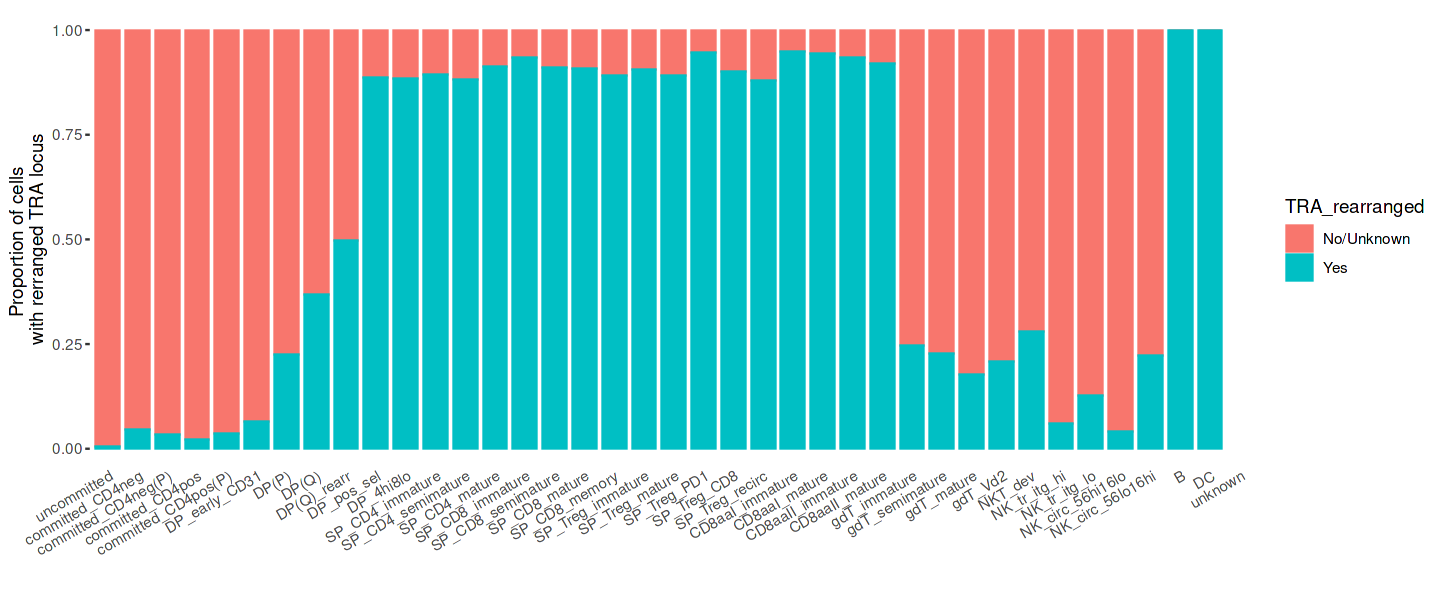

In [55]:
options(repr.plot.width=12, repr.plot.height=5)

ggplot(tcr_meta_summary_TRA, aes(x=celltype, y=Freq, fill= TRA_rearranged, color=TRA_rearranged))+
    geom_bar(stat = 'identity', position = 'fill', width=0.8)+
    theme_bw()+
    theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1.1), panel.grid = element_blank(), panel.border = element_blank(), axis.ticks.x = element_blank())+
    labs(y='Proportion of cells \nwith rerranged TRA locus', x='')

In [56]:
tcr_meta_summary_TRB <- table(seurObj_CITE$anno_CITE_new, seurObj_CITE$TRB_rearranged) %>% data.frame
colnames(tcr_meta_summary_TRB) <- c('celltype', 'TRB_rearranged', 'Freq')
tcr_meta_summary_TRB %>% head

,celltype,TRB_rearranged,Freq
,<fct>,<fct>,<int>
1,uncommitted,No/Unknown,118
2,committed_CD4neg,No/Unknown,1791
3,committed_CD4neg(P),No/Unknown,799
4,committed_CD4pos,No/Unknown,3272
5,committed_CD4pos(P),No/Unknown,290
6,DP_early_CD31,No/Unknown,1017


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


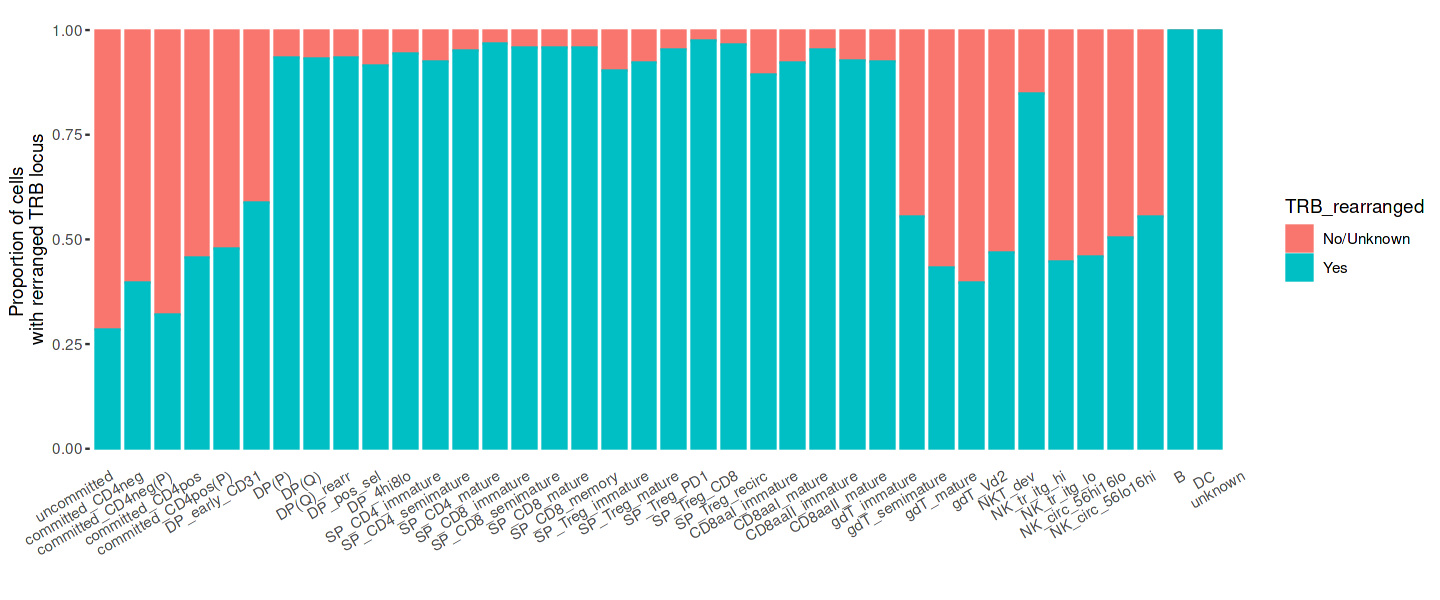

In [57]:
options(repr.plot.width=12, repr.plot.height=5)

ggplot(tcr_meta_summary_TRB, aes(x=celltype, y=Freq, fill= TRB_rearranged, color=TRB_rearranged))+
    geom_bar(stat = 'identity', position = 'fill', width=0.8)+
    theme_bw()+
    theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1.1), panel.grid = element_blank(), panel.border = element_blank(), axis.ticks.x = element_blank())+
    labs(y='Proportion of cells \nwith rerranged TRB locus', x='')

In [58]:
TCRplot <- subset(seurObj_CITE, subset=anno_CITE_new %in% celltypes[c(1:12, 15, 19, 24, 26, 28, 32)])
TCRplot$anno_CITE_new <- factor(TCRplot$anno_CITE_new, levels=celltypes[c(1:12, 15, 19, 24, 26, 28, 32)])

In [59]:
tcr_meta_summary_TRA2 <- table(TCRplot$anno_CITE_new, TCRplot$TRA_rearranged) %>% data.frame
colnames(tcr_meta_summary_TRA2) <- c('celltype', 'TRA_rearranged', 'Freq')
tcr_meta_summary_TRA2

celltype,TRA_rearranged,Freq
<fct>,<fct>,<int>
uncommitted,No/Unknown,164
committed_CD4neg,No/Unknown,2832
committed_CD4neg(P),No/Unknown,1137
committed_CD4pos,No/Unknown,5890
committed_CD4pos(P),No/Unknown,537
DP_early_CD31,No/Unknown,2316
DP(P),No/Unknown,17919
DP(Q),No/Unknown,2512
DP(Q)_rearr,No/Unknown,21905


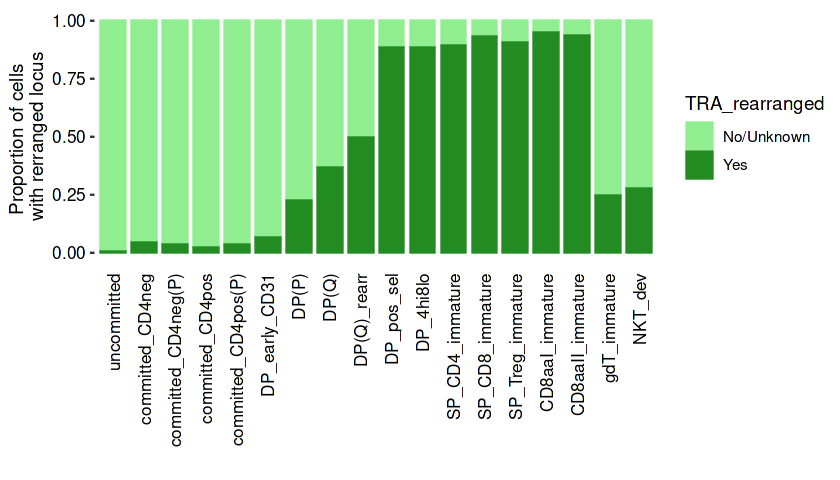

In [60]:
options(repr.plot.width=7, repr.plot.height=4)

p14 <- ggplot(tcr_meta_summary_TRA2, aes(x=celltype, y=Freq, fill= TRA_rearranged, color=TRA_rearranged))+
    geom_bar(stat = 'identity', position = 'fill', width=0.8)+
    theme_bw()+
    scale_fill_manual(values=c('palegreen2', 'forestgreen'))+
    scale_color_manual(values=c('palegreen2', 'forestgreen'))+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=10, color='black'), axis.text.y = element_text(size=10, color='black'), ,
          panel.grid = element_blank(), panel.border = element_blank(), axis.ticks.x = element_blank())+
    labs(y='Proportion of cells \nwith rerranged locus', x='')
p14

In [61]:
tcr_meta_summary_TRB2 <- table(TCRplot$anno_CITE_new, TCRplot$TRB_rearranged) %>% data.frame
colnames(tcr_meta_summary_TRB2) <- c('celltype', 'TRB_rearranged', 'Freq')
tcr_meta_summary_TRB2

celltype,TRB_rearranged,Freq
<fct>,<fct>,<int>
uncommitted,No/Unknown,118
committed_CD4neg,No/Unknown,1791
committed_CD4neg(P),No/Unknown,799
committed_CD4pos,No/Unknown,3272
committed_CD4pos(P),No/Unknown,290
DP_early_CD31,No/Unknown,1017
DP(P),No/Unknown,1509
DP(Q),No/Unknown,272
DP(Q)_rearr,No/Unknown,2863


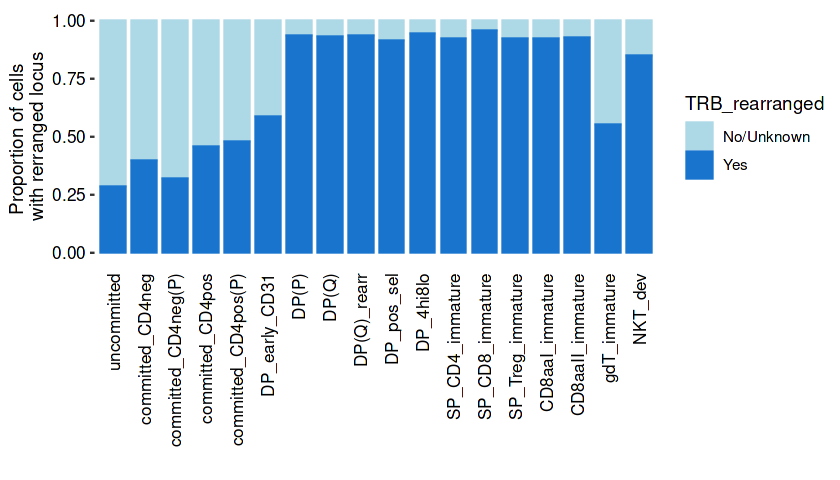

In [62]:
options(repr.plot.width=7, repr.plot.height=4)

p15 <- ggplot(tcr_meta_summary_TRB2, aes(x=celltype, y=Freq, fill= TRB_rearranged, color=TRB_rearranged))+
    geom_bar(stat = 'identity', position = 'fill', width=0.8)+
    theme_bw()+
    scale_fill_manual(values=c('lightblue', 'dodgerblue3'))+
    scale_color_manual(values=c('lightblue', 'dodgerblue3'))+
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=10, color='black'), axis.text.y = element_text(size=10, color='black'), ,
          panel.grid = element_blank(), panel.border = element_blank(), axis.ticks.x = element_blank())+
    labs(y='Proportion of cells \nwith rerranged locus', x='')
p15